# Ex 1

Generate some data.

In [1]:
import numpy as np
n_cls = 20
# Number of samples in each class.
np.random.seed(1) # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2) # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3) # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4) # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
X = np.vstack((np.hstack((x11, x12)), np.hstack((x21, x22))))
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))

Train SVM classifierfrom sklearn import svm
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

In [2]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

SVC(C=1000, kernel='linear', probability=True, random_state=1)

Plot the result on the screen

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

Classify new examples

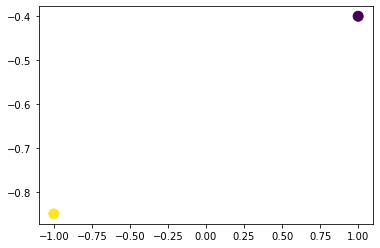

In [4]:
X_new = np.array([
[1, -0.4],
[-1, -0.85],
])
y_new = clf.predict(X_new)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

# Ex 2

In [5]:
%run -i svm_spam


Extracting features from sample email (emailSample1.txt)


==== Processed Email ====


anyon 
know 
how 
much it 
cost to 
host a 
web 
portal 
well it 
depend on 
how 
mani 
visitor 
your 
expect 
thi 
can be 
anywher 
from 
less 
than 
number 
buck a 
month to 
a 
coupl of 
dollarnumb 
you 
should 
checkout 
httpaddr if 
your 
run 
someth 
big to 
unsubscrib 
yourself 
from 
thi 
mail 
list 
send an 
email to 
emailaddr 


(1899, 1)
Length of feature vector: 1

Number of non-zero entries: 42


Loading the training dataset...
The training dataset was loaded.
xtr shape:  (4000, 1899)

Training Linear SVM (Spam Classification)

(this may take 1 to 2 minutes) ...

Training Accuracy: 99.83%


Evaluating the trained Linear SVM on a test set ...

Test Accuracy: 98.90%


Top predictors of spam: 

Word: otherwis | Weight: [0.50061374]
Word: clearli | Weight: [0.46591639]
Word: remot | Weight: [0.42286912]
Word: gt | Weight: [0.3836216]
Word: visa | Weight: [0.3677104]
Word: base | Weight: [0

In [6]:
with open('get_vocabulary_dict.py') as file:
    print(file.read())

#!/usr/bin/python
# -*- coding: utf-8 -*-
import csv

from typing import Dict


def get_vocabulary_dict() -> Dict[int, str]:
    """Read the fixed vocabulary list from the datafile and return.

    :return: a dictionary of words mapped to their indexes
    """

    # FIXME: Parse data from the 'data/vocab.txt' file.
    # - The file is saved in tab-separated values (TSV) format.
    # - Each line contains a word's ID and the word itself.
    # The output dictionary should map word's ID on the word itself, e.g.:
    #   {1: 'aa', 2: 'ab', ...}
    
    num_word = dict()
    
    with open('data/vocab.txt', newline='') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=' ', quotechar='|')
        for row in spamreader:
            split_str = row[0].split()
            number = int(split_str[0])
            word = split_str[1]
            num_word[number] = word

    return num_word



In [7]:
with open('process_email.py') as file:
    print(file.read())

#!/usr/bin/python
# -*- coding: utf-8 -*-
import re
from typing import List

from nltk import PorterStemmer

from get_vocabulary_dict import get_vocabulary_dict


def process_email(email_contents: str) -> List[int]:
    """Pre-process the body of an email and return a list of indices of the
    words contained in the email.

    :param email_contents: the body of an email
    :return: a list of indices of the words contained in the email
    """

    # FIXME: Load the vocabulary.
    vocabulary_dict = get_vocabulary_dict()

    # FIXME: Initialize the return value.
    word_indices = []

    # ========================== Preprocess Email ===========================

    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers

    # header_token = '\n\n'
    # header_start = email_contents.find(header_token)
    # email_contents = email_contents[header_start+len(header_token):]

    # FIXME: Convert email c

In [8]:
with open('email_features.py') as file:
    print(file.read())

#!/usr/bin/python
# -*- coding: utf-8 -*-
from typing import List

import numpy as np


def email_features(word_indices: List[int]) -> np.ndarray:
    """Convert a list of word IDs into a feature vector.

    :param word_indices: a list of word IDs
    :return: a feature vector from the word indices (a row vector)
    """

    # Total number of words in the dictionary
    n_words = 1899

    # FIXME: ====================== YOUR CODE HERE ============================
    # Instructions: Fill in this function to return a feature vector for the
    #               given email (word_indices). To help make it easier to 
    #               process the emails, we have have already pre-processed each
    #               email and converted each word in the email into an index in
    #               a fixed dictionary (of 1899 words). The variable
    #               word_indices contains the list of indices of the words
    #               which occur in one email.
    # 
    #               

In [9]:
with open('svm_spam.py') as file:
    print(file.read())

#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
from sklearn import svm

from process_email import process_email
from email_features import email_features
from get_vocabulary_dict import get_vocabulary_dict


def read_file(file_path: str) -> str:
    """Return the content of the text file under the given path.

    :param file_path: path to the file
    :return: file content
    """

    with open(file_path) as f:
        file_content = f.read()
    return file_content


# %% ==================== Part 1: Email Preprocessing ====================
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in process_email.py to produce a word indices vector
#  for a given email.

# print('\nPreprocessing sample email (emailSample1.txt)\n')

# Print Stats
# print('Word Indices: \n')
# print(word_indices